# 단어 임베딩 유사도 평가

In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath('/notebooks/embedding'))
sys.path.insert(0, os.path.abspath('/notebooks/embedding/models'))
#sys.path.append('/notebooks/embedding')

In [3]:
# ! wget https://github.com/dongjun-Lee/kor2vec/raw/master/test_dataset/kor_ws353.csv -P /notebooks/embedding/data/raw

In [4]:
eval_fname='/notebooks/embedding/data/raw/kor_ws353.csv'

In [5]:
from models.word_eval import WordEmbeddingEvaluator

## 코드 4-35 단어 유사도 평가 수행 코드 (word2vec)

In [6]:
eval_fname='/notebooks/embedding/data/raw/kor_ws353.csv'

In [7]:
vecs_txt_fname='/notebooks/embedding/data/word-embeddings/word2vec/word2vec'
method='word2vec'
dim=100
tokenizer_name='mecab'

In [8]:
from models.word_eval import WordEmbeddingEvaluator

In [9]:
model = WordEmbeddingEvaluator(vecs_txt_fname=vecs_txt_fname, 
                               method=method, 
                               dim=dim, 
                               tokenizer_name=tokenizer_name)

In [10]:
model.word_sim_test(eval_fname)

spearman corr: 0.5770993871014621 , pearson corr: 0.5956751142850295 , # of errors: 0


## 코드 4-35 단어 유사도 평가 수행 코드 (fasttext)

In [10]:
eval_fname='/notebooks/embedding/data/raw/kor_ws353.csv'

In [11]:
vecs_txt_fname='/notebooks/embedding/data/word-embeddings/fasttext/fasttext.vec'
vecs_bin_fname='/notebooks/embedding/data/word-embeddings/fasttext/fasttext.bin'
method='fasttext'
dim=100
tokenizer_name='mecab'

In [12]:
from models.word_eval import WordEmbeddingEvaluator

In [13]:
model = WordEmbeddingEvaluator(vecs_txt_fname=vecs_txt_fname, 
                               vecs_bin_fname=vecs_bin_fname, 
                               method=method, 
                               dim=dim, 
                               tokenizer_name=tokenizer_name)

In [14]:
model.word_sim_test(eval_fname)

spearman corr: 0.636179558597476 , pearson corr: 0.6386177571595193 , # of errors: 0


# glove

In [37]:
vecs_txt_fname='/notebooks/embedding/data/word-embeddings/glove/glove.txt'
method='glove'
dim=100
tokenizer_name='mecab'

In [38]:
model = WordEmbeddingEvaluator(vecs_txt_fname=vecs_txt_fname, 
                               method=method, 
                               dim=dim, 
                               tokenizer_name=tokenizer_name)

In [39]:
model.word_sim_test(eval_fname)

spearman corr: 0.49029953452220065 , pearson corr: 0.5383746018370396 , # of errors: 0


## swivel

In [13]:
vecs_txt_fname='/notebooks/embedding/data/word-embeddings/swivel/row_embedding.tsv'
method='swivel'
dim=100
tokenizer_name='mecab'

In [14]:
model = WordEmbeddingEvaluator(vecs_txt_fname=vecs_txt_fname, 
                               method=method, 
                               dim=dim, 
                               tokenizer_name=tokenizer_name)

In [15]:
model.word_sim_test(eval_fname)

spearman corr: 0.549541215508716 , pearson corr: 0.5727286333920304 , # of errors: 0


In [16]:
# word2vec: spearman corr: 0.5770993871014621 , pearson corr: 0.5956751142850295 
#  fasttext: spearman corr: 0.636179558597476 , pearson corr: 0.6386177571595193 ,
# glove: spearman corr: 0.49029953452220065 , pearson corr: 0.5383746018370396
# swivel: spearman corr: 0.549541215508716 , pearson corr: 0.5727286333920304

In [19]:
%matplotlib inline

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.DataFrame(
    {"word2vec": [0.5770993871014621, 0.5956751142850295 ],
     "fasttext": [0.636179558597476, 0.6386177571595193 ],
     "glove": [0.49029953452220065, 0.5383746018370396],
     "swivel": [0.549541215508716, 0.5727286333920304 ]
    }, 
    index=["spearman", "pearson"])

In [23]:
df.head()

,fasttext,glove,swivel,word2vec
spearman,0.577099,0.490300,0.549541,0.577099
pearson,0.595675,0.538375,0.572729,0.595675


In [49]:
df = pd.DataFrame(
    {"spearman": [0.5770993871014621, 0.636179558597476, 0.49029953452220065, 0.549541215508716 ],
     "pearson": [0.5956751142850295, 0.6386177571595193, 0.5383746018370396, 0.5727286333920304 ]}, 
    index=["word2vec", "fasttext","glove","swivel"])

In [50]:
df.head()

,pearson,spearman
word2vec,0.595675,0.577099
fasttext,0.638618,0.636180
glove,0.538375,0.490300
swivel,0.572729,0.549541


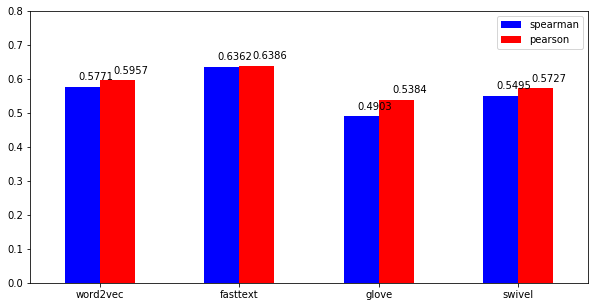

In [77]:
ax = df.plot(kind="bar", y=['spearman','pearson'], color=['b','r'], figsize=(10,5),rot=0)
plt.ylim(0,0.8)
x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.4f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))